In [1]:
import os
import gc
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm.notebook import tqdm


pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.3f}'.format

%matplotlib inline

In [2]:
def floorify_frac(x, interval=1):
    """convert to int if float appears ordinal"""
    xt = (np.floor(x/interval+1e-6)).fillna(-1)
    if np.max(xt)<=127:
        return xt.astype(np.int8)
    return xt.astype(np.int16)  

In [3]:
%%time
with open('../input/train_data.pkl', 'rb') as f:
    df = pickle.load(f)

df['S_2'] = pd.to_datetime(df['S_2'].values)

# ラベルを付与
label = pd.read_csv('../input/train_labels.csv')
df = pd.merge(df, label, on='customer_ID', how='left')

CPU times: user 3.06 s, sys: 8.81 s, total: 11.9 s
Wall time: 15 s


In [4]:
df.shape

(5531451, 191)

In [5]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938,0.002,0.009,1.007,0.009,0.124,0.009,0.005,NaN,NaN,0.001,0.081,0.709,0.171,0.006,0.359,0.525,0.256,NaN,0.064,0.059,0.006,0.149,1.336,0.008,0.001,0.207,0.736,0.096,NaN,0.023,0.003,0.008,1.002,0.008,0.161,0.148,0.923,0.355,0.152,0.118,0.002,0.159,0.066,0.018,0.064,0.200,0.308,0.016,0.402,0.091,CR,O,0.007,0.008,NaN,0.653,0.009,NaN,0.005,6.000,0.272,0.008,0.515,0.003,0.009,0.005,0.008,0.119,0.005,0.108,0.051,NaN,0.008,0.080,0.069,NaN,0.004,0.008,NaN,0.008,0.000,0.002,0.004,0.001,NaN,0.002,0.004,0.007,0.002,0.002,0.004,0.507,0.008,1.010,0.085,0.004,0.007,0.000,0.006,0.001,0.005,NaN,0.000,0.006,0.007,NaN,0.000,0.009,NaN,1,0.003,0.005,0.007,0.010,0.008,0.002,1.001,0.003,0.007,0.007,1.504,1.006,0.004,0.009,0.004,0.004,0.005,0.894,0.136,0.911,0.975,0.001,0.767,1.009,1.005,0.894,NaN,0.670,0.010,0.005,NaN,1.009,2.000,NaN,0.004,NaN,NaN,NaN,1.007,0.210,0.677,0.008,1.000,0.238,0.000,4.000,0.232,0.236,0.000,0.702,0.434,0.003,0.687,0.009,1.000,1.003,1.008,1.000,0.007,NaN,0.002,0.006,NaN,0.004,0.002,NaN,NaN,NaN,NaN,NaN,0.002,0.004,0.004,NaN,0.001,0.001,0.003,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.937,0.006,0.005,1.001,0.006,0.127,0.001,0.003,NaN,NaN,0.003,0.069,0.713,0.113,0.006,0.354,0.521,0.223,NaN,0.065,0.058,0.002,0.150,1.340,0.008,0.002,0.203,0.721,0.100,NaN,0.031,0.003,0.002,1.009,0.005,0.141,0.144,0.919,0.327,0.156,0.119,0.002,0.148,0.094,0.013,0.066,0.151,0.265,0.018,0.406,0.087,CR,O,0.002,0.007,NaN,0.647,0.002,NaN,0.004,6.000,0.189,0.004,0.509,0.004,0.008,0.001,0.007,0.141,0.000,0.101,0.040,NaN,0.005,0.081,0.074,NaN,0.004,0.005,NaN,0.002,0.001,0.010,0.008,0.001,NaN,0.010,0.000,0.006,0.000,0.001,0.008,0.501,0.001,1.009,0.082,0.000,0.008,0.004,0.002,0.009,0.004,NaN,0.000,0.008,0.007,NaN,0.001,0.006,NaN,1,0.008,0.009,0.002,0.010,0.006,0.002,1.007,0.003,0.007,0.003,1.504,1.006,0.001,0.000,0.008,0.009,0.003,0.902,0.136,0.920,0.976,0.005,0.786,1.000,1.004,0.907,NaN,0.669,0.004,0.005,NaN,1.003,2.000,NaN,0.009,NaN,NaN,NaN,1.008,0.184,0.822,0.003,1.000,0.247,0.000,4.000,0.244,0.242,0.000,0.707,0.431,0.001,0.686,0.001,1.000,1.008,1.004,1.008,0.004,NaN,0.001,0.005,NaN,0.007,0.005,NaN,NaN,NaN,NaN,NaN,0.004,0.003,0.005,NaN,0.010,0.005,0.009,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954,0.092,0.022,1.010,0.007,0.124,0.008,0.009,NaN,NaN,0.008,0.069,0.721,0.060,0.003,0.335,0.525,0.189,NaN,0.067,0.057,0.005,0.152,1.337,0.009,0.007,0.207,0.738,0.134,NaN,0.048,0.010,0.001,1.009,0.007,0.112,0.137,1.002,0.304,0.154,0.115,0.006,0.140,0.085,0.057,0.071,0.306,0.212,0.064,0.407,0.094,CR,O,0.002,0.004,NaN,0.646,0.000,NaN,0.005,6.000,0.495,0.007,0.679,0.001,0.006,0.009,0.003,0.076,0.007,0.103,0.047,NaN,0.007,0.079,0.077,NaN,0.002,0.001,NaN,0.005,0.006,0.010,0.003,0.008,NaN,0.009,0.001,0.005,0.007,0.008,0.009,0.505,0.004,1.004,0.082,0.003,0.004,0.007,0.008,0.002,0.007,NaN,0.000,0.006,0.001,NaN,0.008,0.009,NaN,1,0.007,0.002,0.009,0.008,0.007,0.008,1.001,0.010,0.010,0.005,1.503,1.006

### D_39

<AxesSubplot:xlabel='D_39', ylabel='Count'>

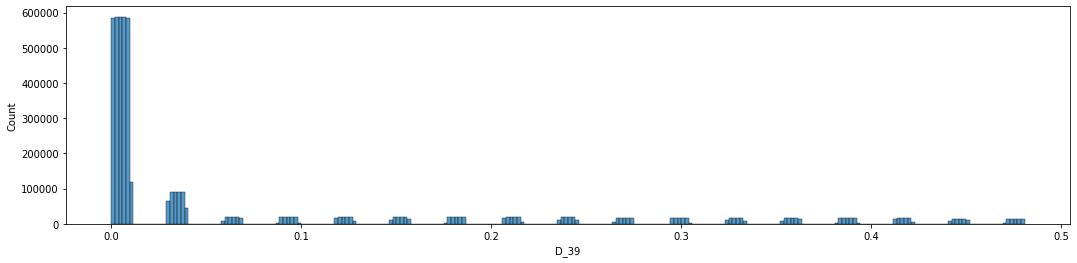

In [14]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_39', data=df.query("0.0 <= D_39 < 0.5"), bins=250)

<AxesSubplot:xlabel='D_39', ylabel='Count'>

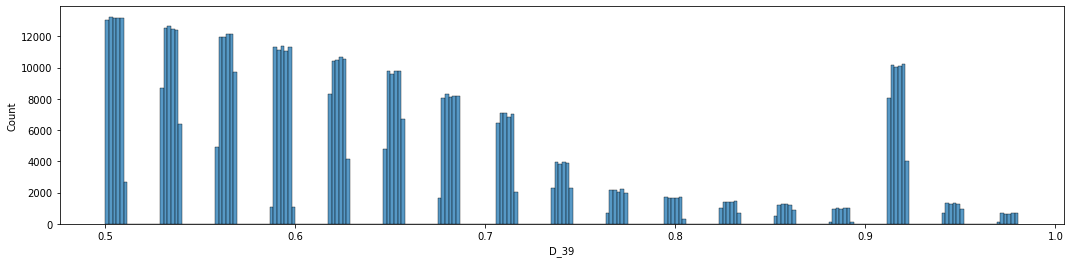

In [87]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_39', data=df.query("0.5 <= D_39 < 1.0"), bins=250)

In [16]:
df['D_39_prep'] = floorify_frac(df['D_39'], interval=1/34)

df.groupby('D_39_prep')['D_39'].agg(['min', 'max', 'count']).head(20)

,min,max,count
D_39_prep,,,
0,0.000,0.010,3053463
1,0.029,0.039,476208
2,0.059,0.069,102479
3,0.088,0.098,103975
4,0.118,0.128,101466
5,0.147,0.157,100753
6,0.176,0.186,98736
7,0.206,0.216,98060
8,0.235,0.245,98985


### D_41

<AxesSubplot:xlabel='D_41', ylabel='Count'>

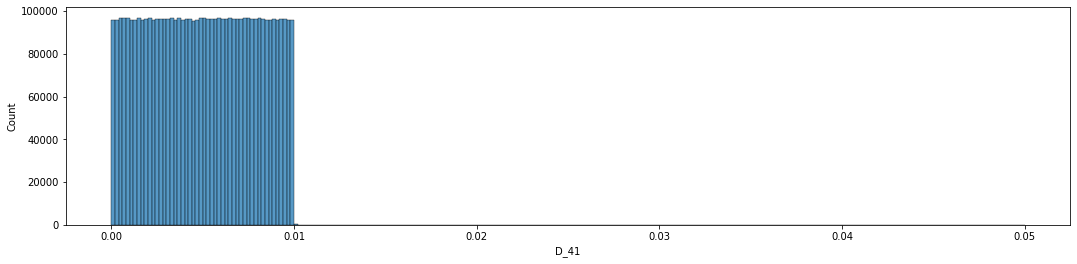

In [19]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_41', data=df.query("0.0 <= D_41 < 0.05"), bins=250)

<AxesSubplot:xlabel='D_41', ylabel='Count'>

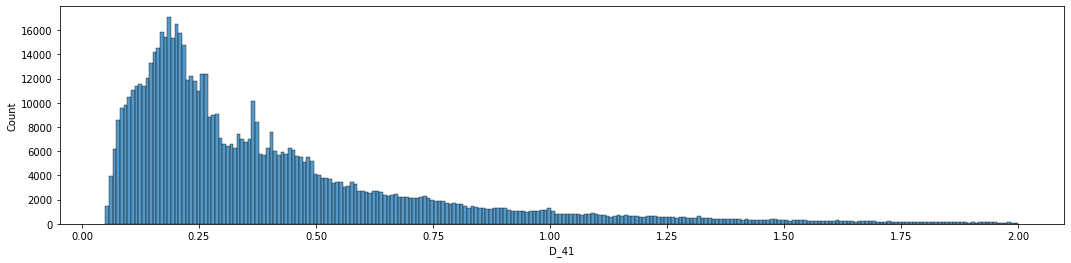

In [23]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_41', data=df.query("0.05 <= D_41 < 2"), bins=250)

### D_42

<AxesSubplot:xlabel='D_42', ylabel='Count'>

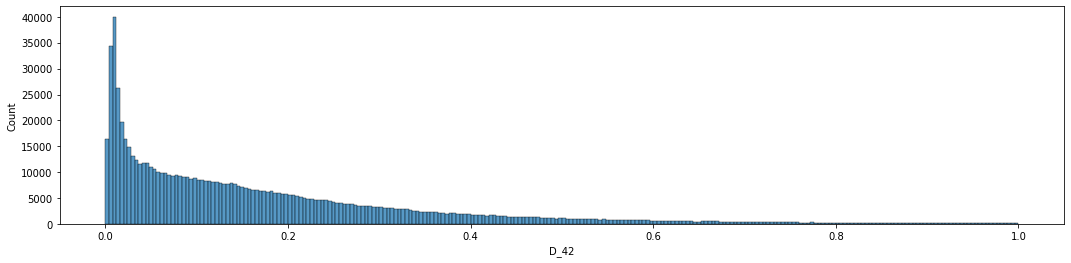

In [26]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_42', data=df.query("0.0 <= D_42 < 1"), bins=250)

<AxesSubplot:xlabel='D_42', ylabel='Count'>

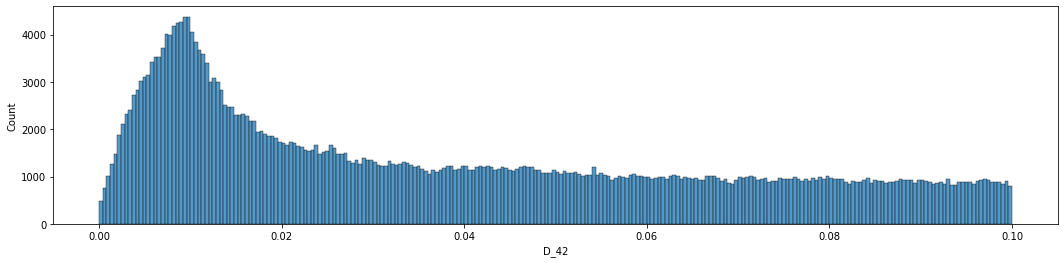

In [27]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_42', data=df.query("0.0 <= D_42 < 0.1"), bins=250)

### D_43

<AxesSubplot:xlabel='D_43', ylabel='Count'>

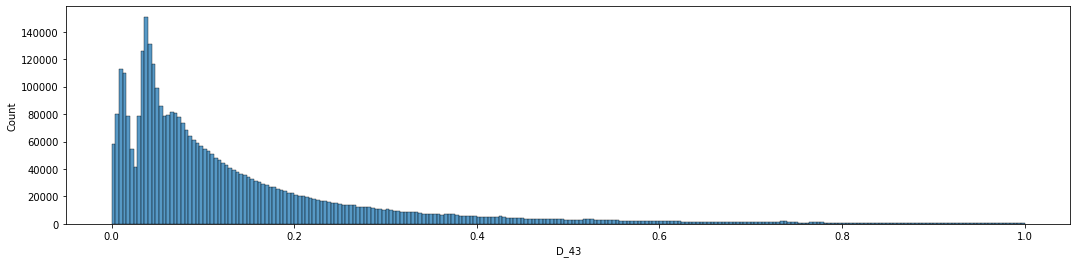

In [28]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_43', data=df.query("0.0 <= D_43 < 1"), bins=250)

<AxesSubplot:xlabel='D_43', ylabel='Count'>

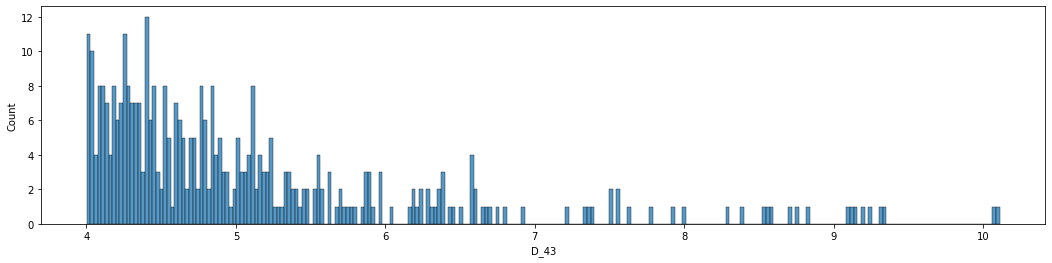

In [30]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_43', data=df.query("4 <= D_43"), bins=250)

### D_44

<AxesSubplot:xlabel='D_44', ylabel='Count'>

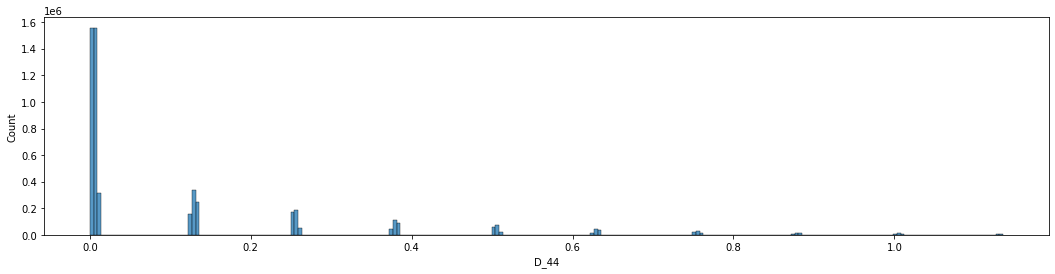

In [35]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_44', data=df.query("0.0 <= D_44 < 1.2"), bins=250)

In [33]:
df['D_44_prep'] = floorify_frac(df['D_44'], interval=1/8)

df.groupby('D_44_prep')['D_44'].agg(['min', 'max', 'count']).head(20)

,min,max,count
D_44_prep,,,
-1,NaN,NaN,0
0,0.000,0.010,3428702
1,0.125,0.135,739265
2,0.250,0.260,406169
3,0.375,0.385,251447
4,0.500,0.510,160039
5,0.625,0.635,100686
6,0.750,0.760,63557
7,0.875,0.885,39350


### D_45

<AxesSubplot:xlabel='D_45', ylabel='Count'>

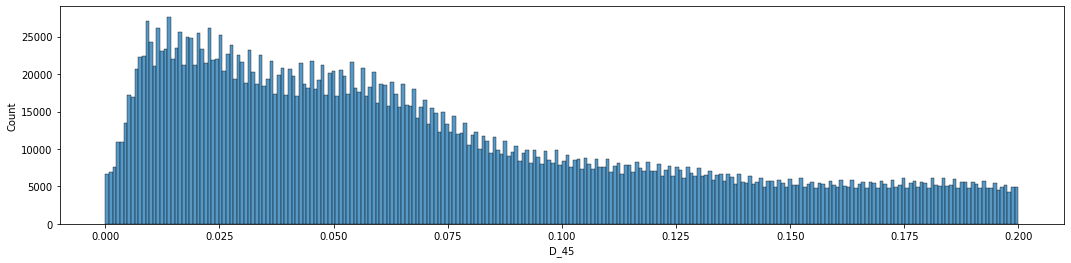

In [42]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_45', data=df.query("0.0 <= D_45 < 0.2"), bins=250)

### D_46

<AxesSubplot:xlabel='D_46', ylabel='Count'>

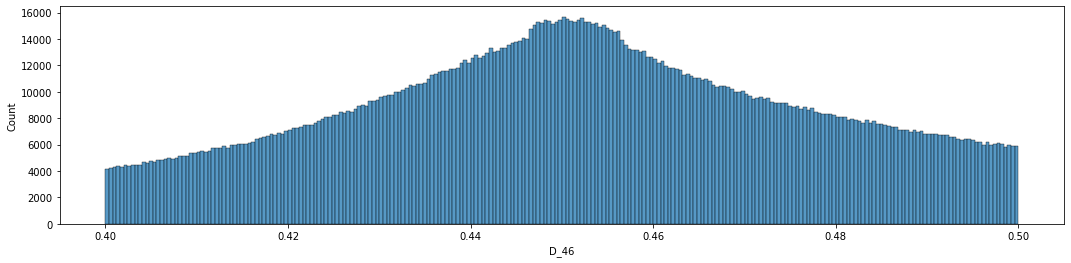

In [40]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_46', data=df.query("0.4 <= D_46 < 0.5"), bins=250)

### D_47

<AxesSubplot:xlabel='D_47', ylabel='Count'>

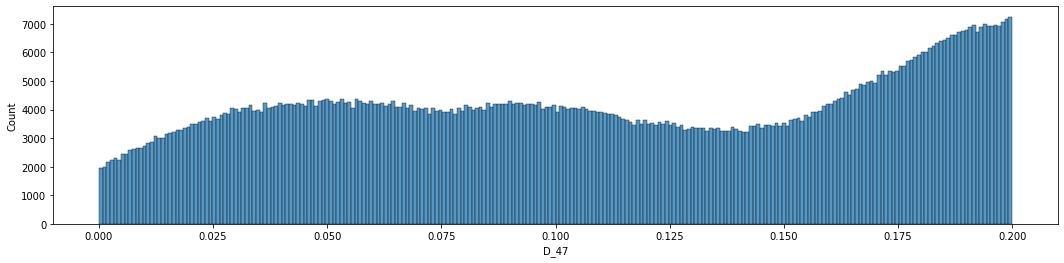

In [44]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_47', data=df.query("0.0 <= D_47 < 0.2"), bins=250)

### D_48

<AxesSubplot:xlabel='D_48', ylabel='Count'>

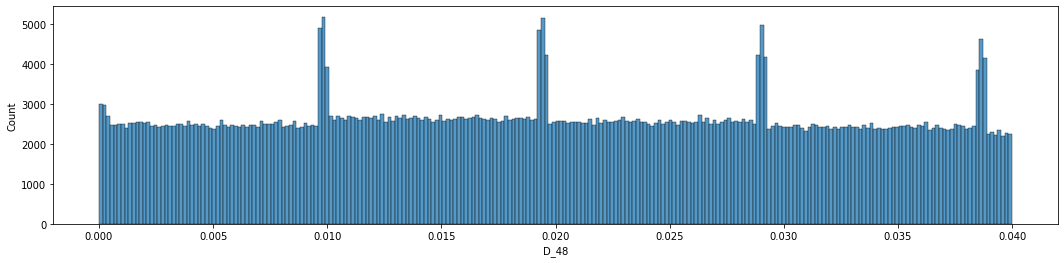

In [48]:
plt.figure(figsize=(18, 4))
sns.histplot(x='D_48', data=df.query("0.0 <= D_48 < 0.04"), bins=250)

### D_49

<AxesSubplot:xlabel='D_49', ylabel='Count'>

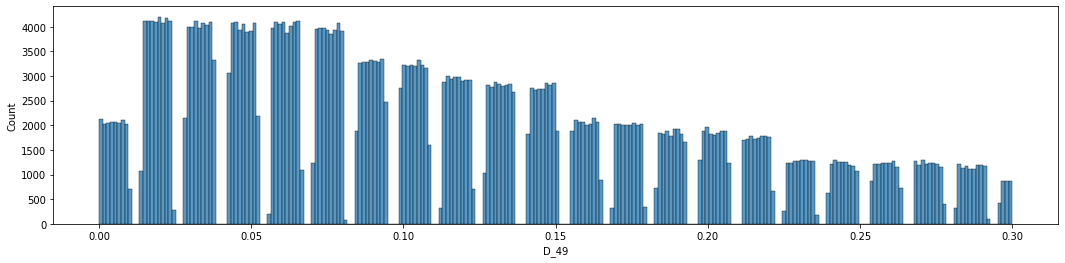

In [54]:
feat = 'D_49'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 0.3"), bins=250)

<AxesSubplot:xlabel='D_49', ylabel='Count'>

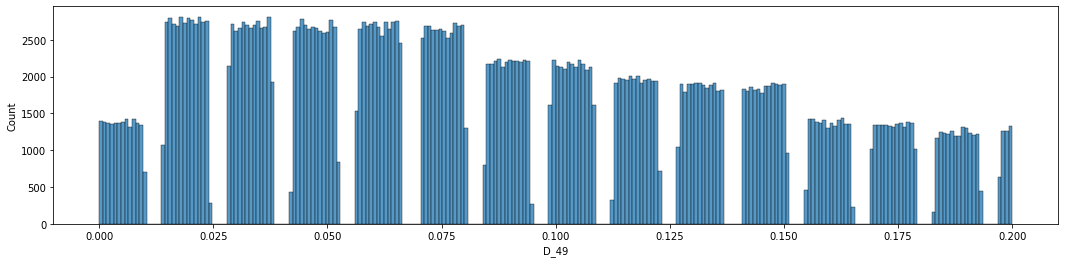

In [58]:
feat = 'D_49'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 0.2"), bins=250)

<AxesSubplot:xlabel='D_49', ylabel='Count'>

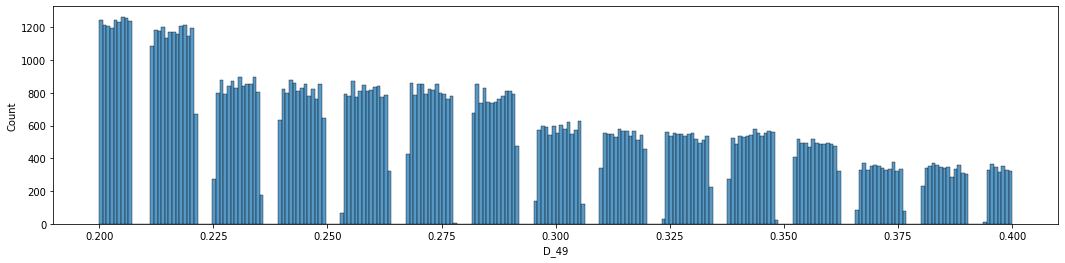

In [59]:
feat = 'D_49'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.2 <= {feat} < 0.4"), bins=250)

<AxesSubplot:xlabel='D_49', ylabel='Count'>

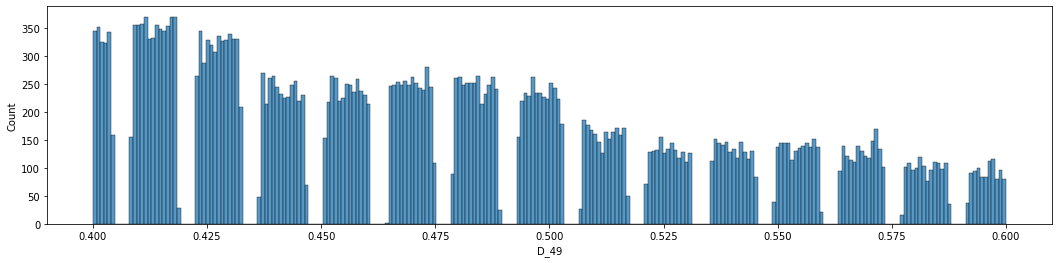

In [60]:
feat = 'D_49'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.4 <= {feat} < 0.6"), bins=250)

<AxesSubplot:xlabel='D_49', ylabel='Count'>

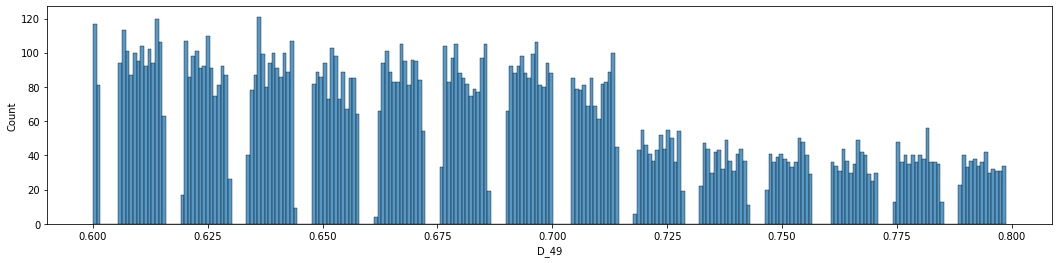

In [61]:
feat = 'D_49'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.6 <= {feat} < 0.8"), bins=250)

<AxesSubplot:xlabel='D_49', ylabel='Count'>

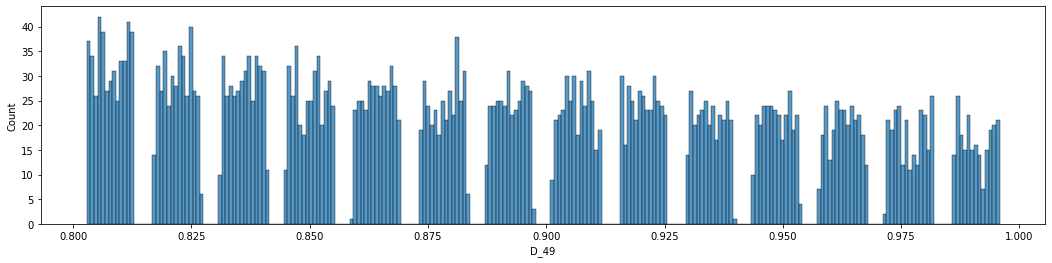

In [62]:
feat = 'D_49'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.8 <= {feat} < 1.0"), bins=250)

### D_50

<AxesSubplot:xlabel='D_50', ylabel='Count'>

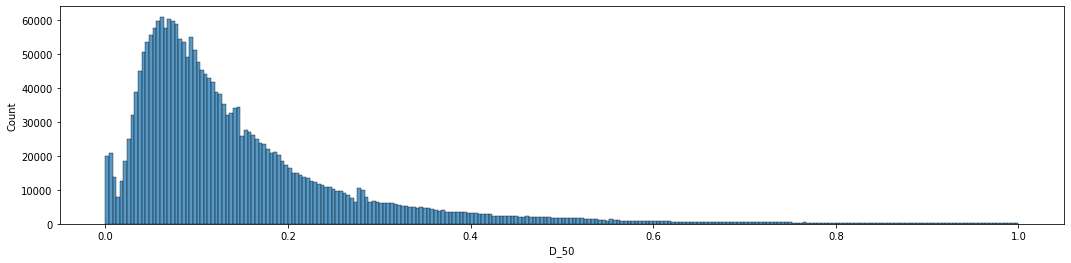

In [64]:
feat = 'D_50'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 1.0"), bins=250)

### D_51

<AxesSubplot:xlabel='D_51', ylabel='Count'>

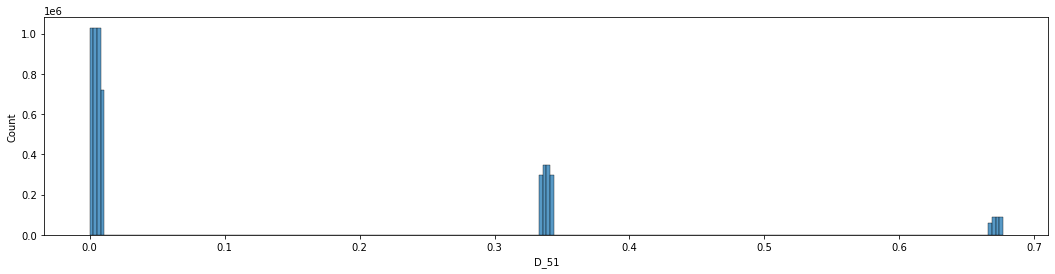

In [65]:
feat = 'D_51'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 1.0"), bins=250)

In [66]:
df['D_51_prep'] = floorify_frac(df['D_51'], interval=1/3)

df.groupby('D_51_prep')['D_51'].agg(['min', 'max', 'count']).head(20)

,min,max,count
D_51_prep,,,
0,0.000,0.010,3800362
1,0.333,0.343,1290125
2,0.667,0.677,322793
3,1.000,1.010,90456
4,1.333,1.343,22185
5,1.667,1.677,4702
6,2.000,2.010,680
7,2.333,2.343,131
8,2.667,2.677,17


### D_52

<AxesSubplot:xlabel='D_52', ylabel='Count'>

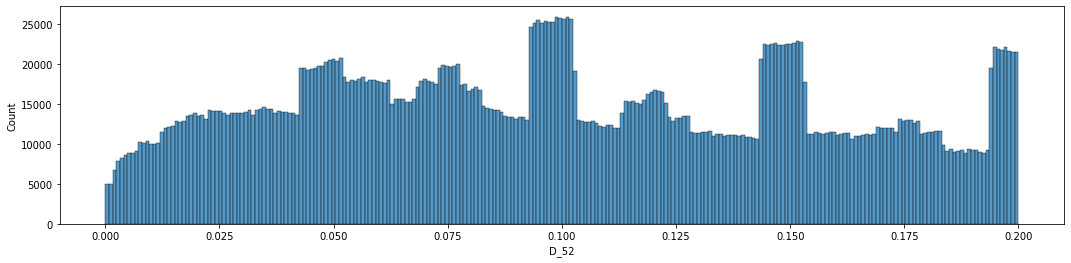

In [68]:
feat = 'D_52'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 0.2"), bins=250)

### D_53

<AxesSubplot:xlabel='D_53', ylabel='Count'>

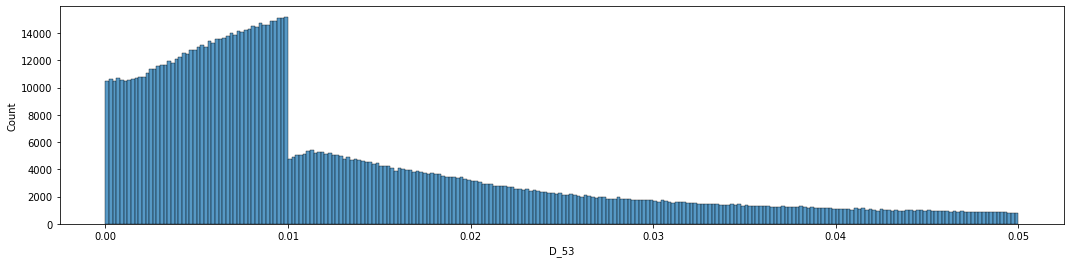

In [70]:
feat = 'D_53'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 0.05"), bins=250)

### D_54

<AxesSubplot:xlabel='D_54', ylabel='Count'>

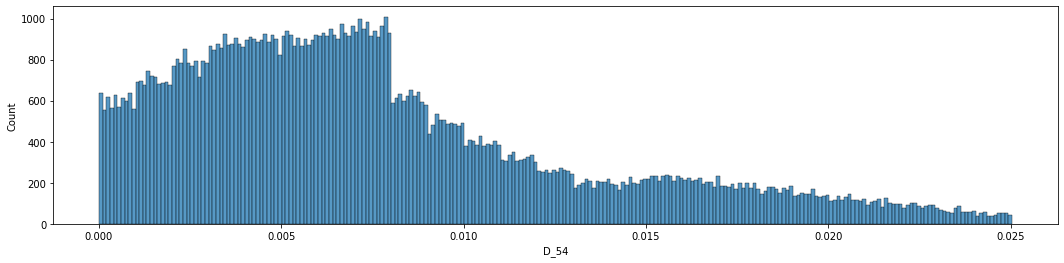

In [73]:
feat = 'D_54'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0 <= {feat} < 1.0"), bins=250)

<AxesSubplot:xlabel='D_54', ylabel='Count'>

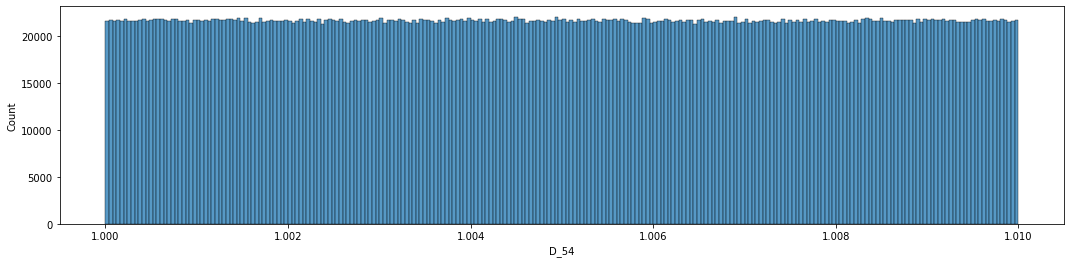

In [74]:
feat = 'D_54'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"1.0 <= {feat} < 1.2"), bins=250)

### D_55

<AxesSubplot:xlabel='D_55', ylabel='Count'>

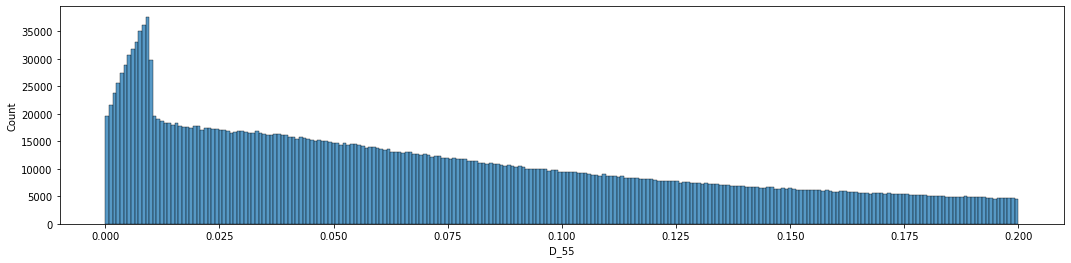

In [76]:
feat = 'D_55'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0 <= {feat} < 0.2"), bins=250)

### D_56

<AxesSubplot:xlabel='D_56', ylabel='Count'>

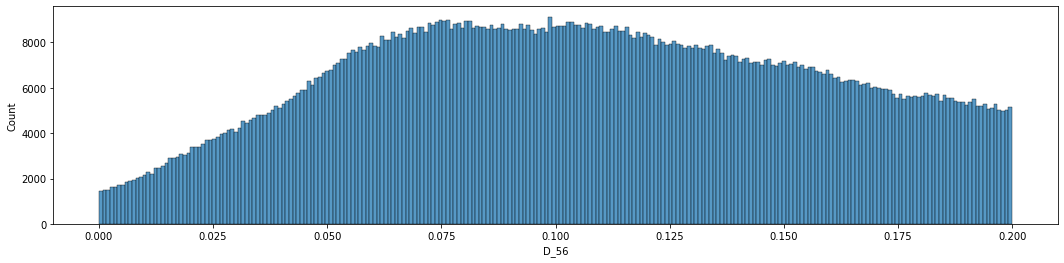

In [77]:
feat = 'D_56'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0 <= {feat} < 0.2"), bins=250)

### D_58

<AxesSubplot:xlabel='D_58', ylabel='Count'>

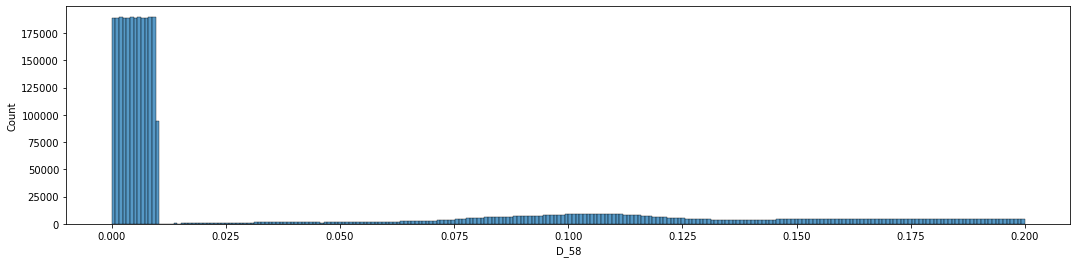

In [80]:
feat = 'D_58'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0 <= {feat} < 0.2"), bins=250)

<AxesSubplot:xlabel='D_58', ylabel='Count'>

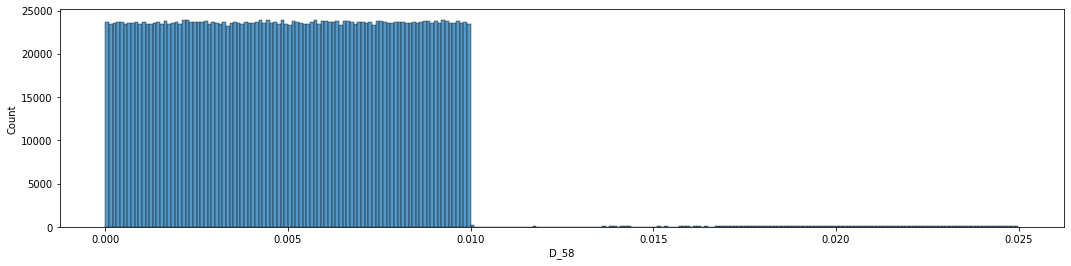

In [83]:
feat = 'D_58'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0 <= {feat} < 0.025"), bins=250)

<AxesSubplot:xlabel='D_58', ylabel='Count'>

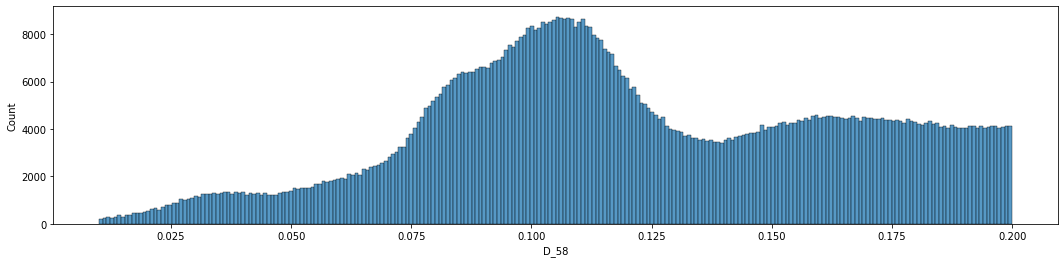

In [81]:
feat = 'D_58'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.01 <= {feat} < 0.2"), bins=250)

<AxesSubplot:xlabel='D_58', ylabel='Count'>

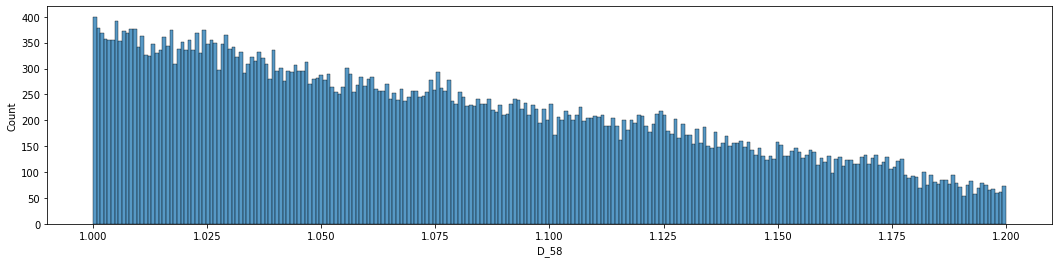

In [82]:
feat = 'D_58'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"1 <= {feat} < 1.2"), bins=250)

### D_59

<AxesSubplot:xlabel='D_59', ylabel='Count'>

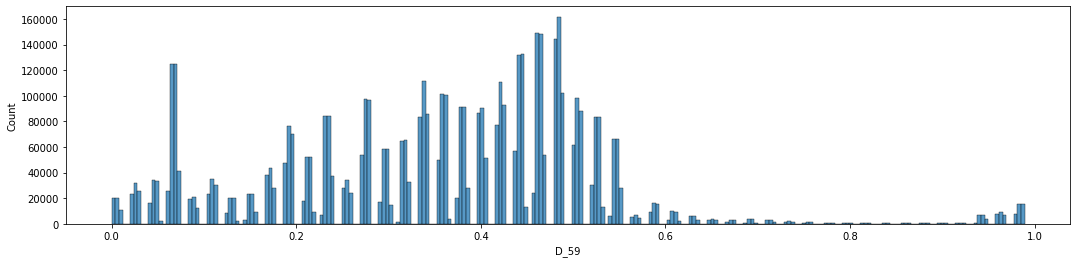

In [85]:
feat = 'D_59'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 1.0"), bins=250)

<AxesSubplot:xlabel='D_59', ylabel='Count'>

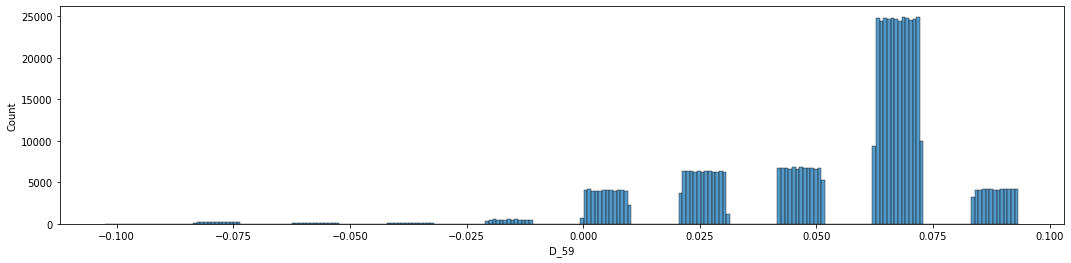

In [86]:
feat = 'D_59'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"-1.0 <= {feat} < 0.1"), bins=250)

### D_60

<AxesSubplot:xlabel='D_60', ylabel='Count'>

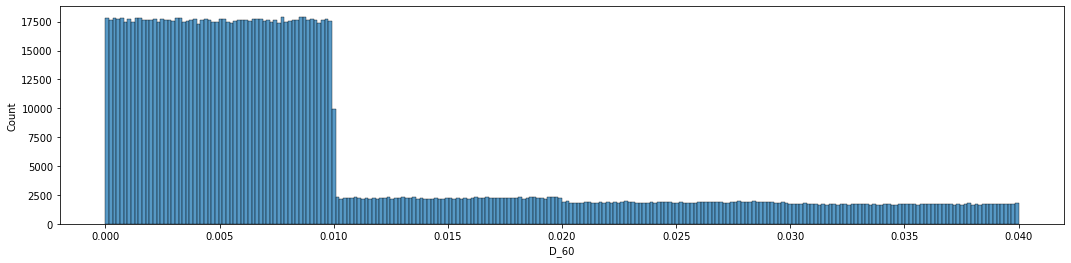

In [93]:
feat = 'D_60'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 0.04"), bins=250)

### D_61

<AxesSubplot:xlabel='D_61', ylabel='Count'>

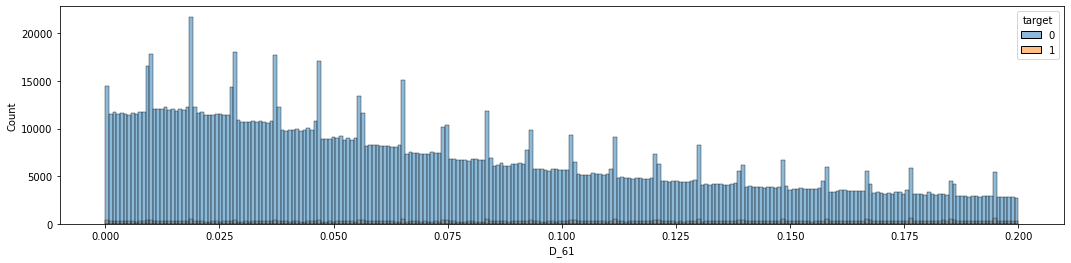

In [98]:
feat = 'D_61'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 0.2"), bins=250, hue='target')

### D_62

<AxesSubplot:xlabel='D_62', ylabel='Count'>

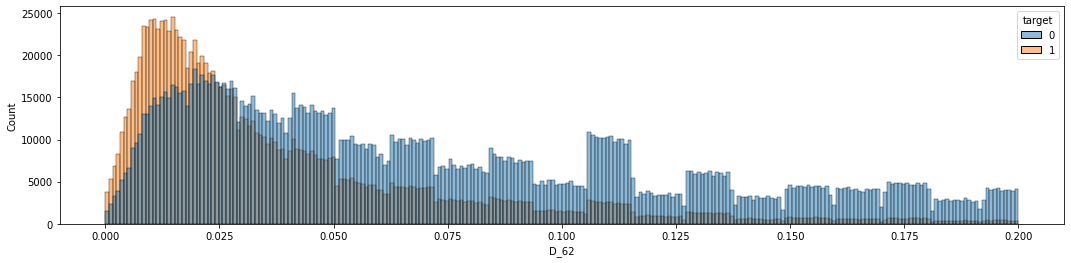

In [97]:
feat = 'D_62'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 0.2"), bins=250, hue='target')

### D_65

<AxesSubplot:xlabel='D_65', ylabel='Count'>

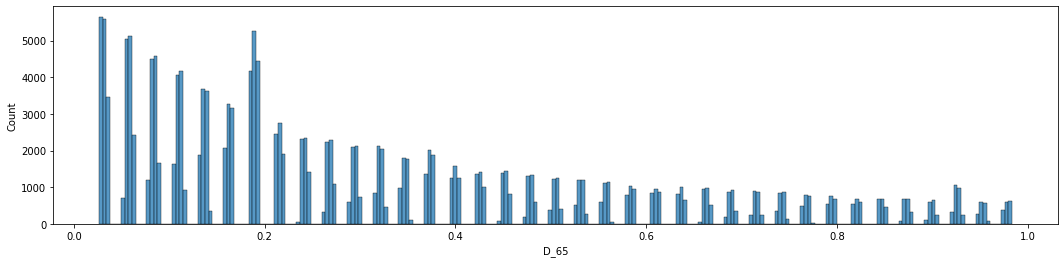

In [12]:
feat = 'D_65'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.011 <= {feat} < 1.0"), bins=250)

### D_69

<AxesSubplot:xlabel='D_69', ylabel='Count'>

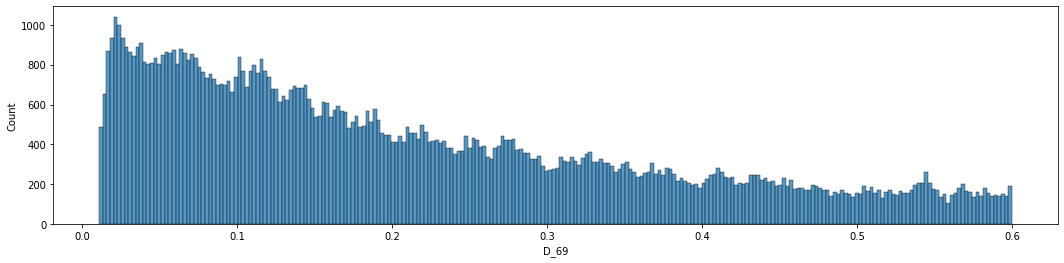

In [21]:
feat = 'D_69'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.011 <= {feat} < 0.6"), bins=250)

### D_70

<AxesSubplot:xlabel='D_70', ylabel='Count'>

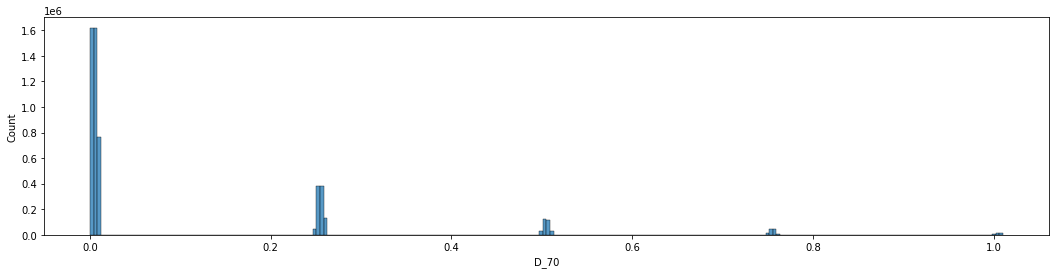

In [25]:
feat = 'D_70'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 1.2"), bins=250)

### D_71

<AxesSubplot:xlabel='D_71', ylabel='Count'>

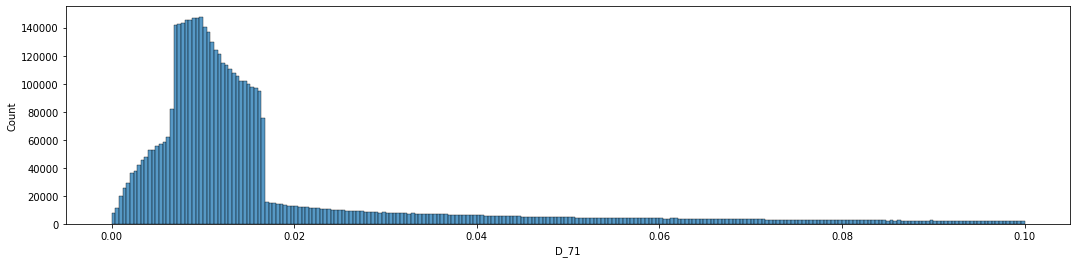

In [27]:
feat = 'D_71'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} < 0.1"), bins=250)

### D_72

<AxesSubplot:xlabel='D_72', ylabel='Count'>

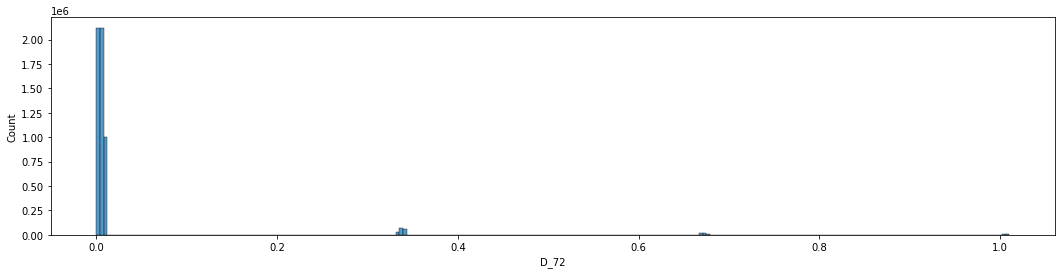

In [32]:
feat = 'D_72'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

### D_73

<AxesSubplot:xlabel='D_73', ylabel='Count'>

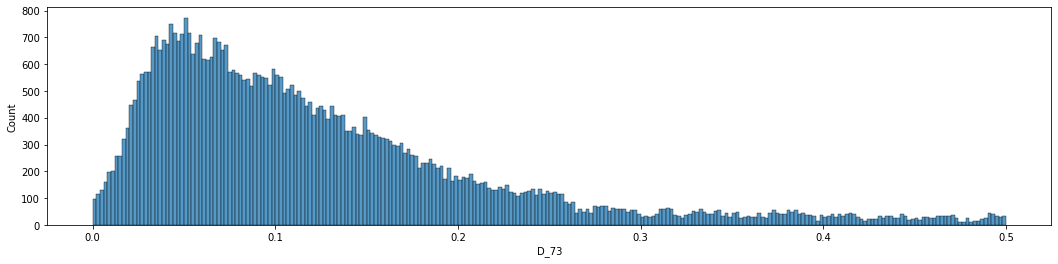

In [34]:
feat = 'D_73'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 0.5"), bins=250)

### D_74

<AxesSubplot:xlabel='D_74', ylabel='Count'>

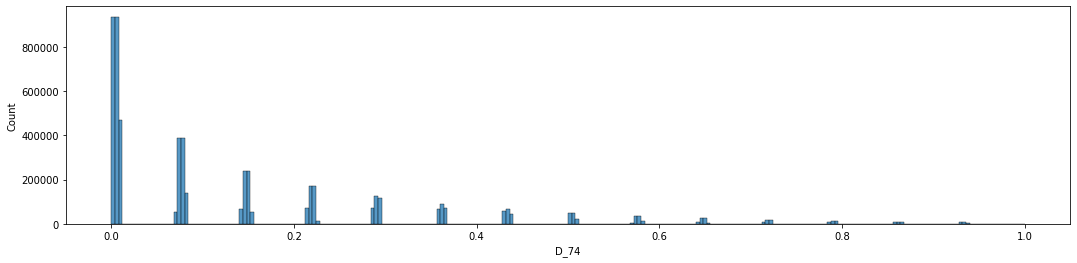

In [38]:
feat = 'D_74'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.0"), bins=250)

### D_75

<AxesSubplot:xlabel='D_75', ylabel='Count'>

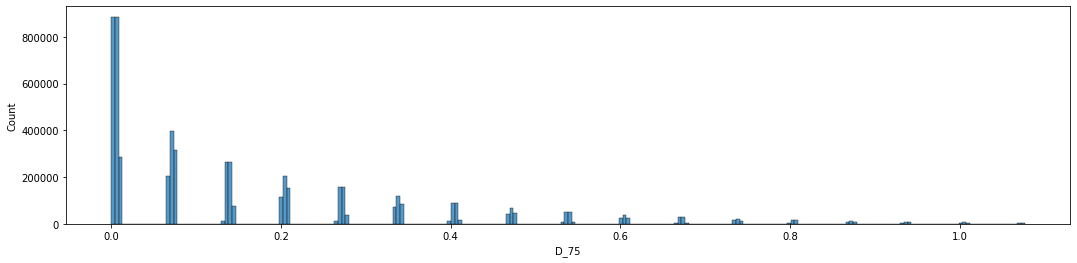

In [40]:
feat = 'D_75'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

### D_76

<AxesSubplot:xlabel='D_76', ylabel='Count'>

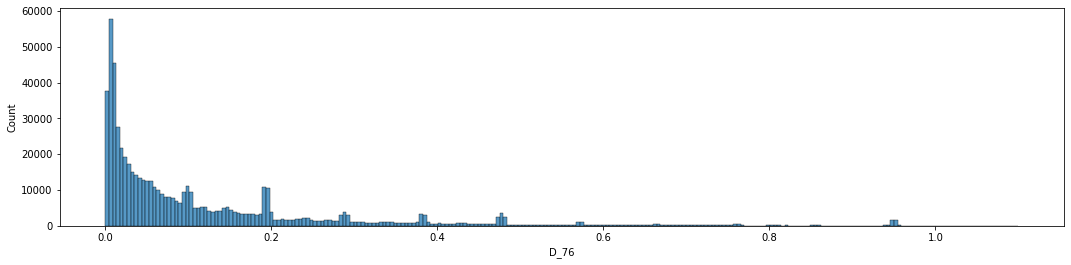

In [41]:
feat = 'D_76'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

### D_77

<AxesSubplot:xlabel='D_77', ylabel='Count'>

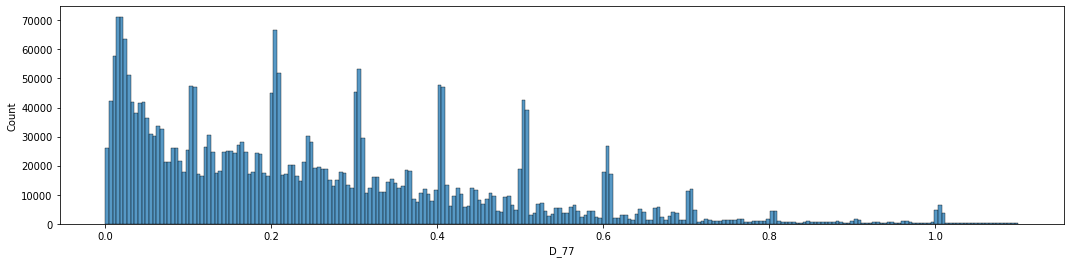

In [42]:
feat = 'D_77'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

### D_78

<AxesSubplot:xlabel='D_78', ylabel='Count'>

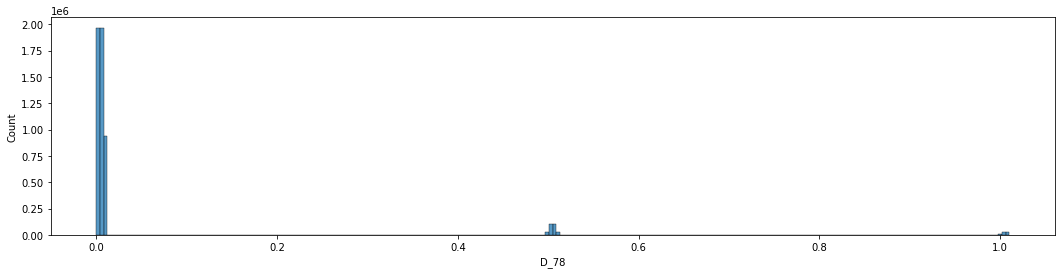

In [43]:
feat = 'D_78'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

### D_79

<AxesSubplot:xlabel='D_79', ylabel='Count'>

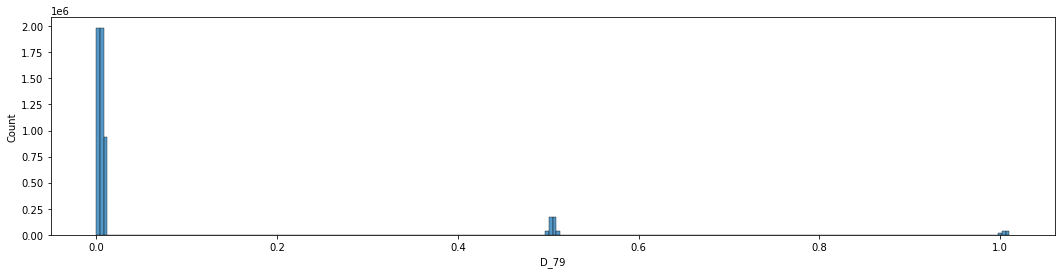

In [44]:
feat = 'D_79'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

### D_80

<AxesSubplot:xlabel='D_80', ylabel='Count'>

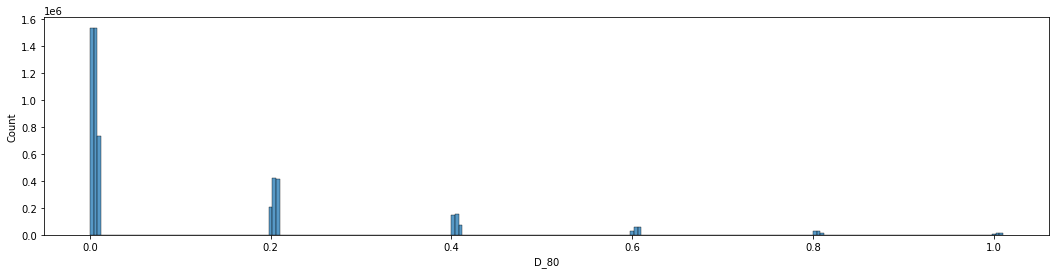

In [45]:
feat = 'D_80'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

### D_81

<AxesSubplot:xlabel='D_81', ylabel='Count'>

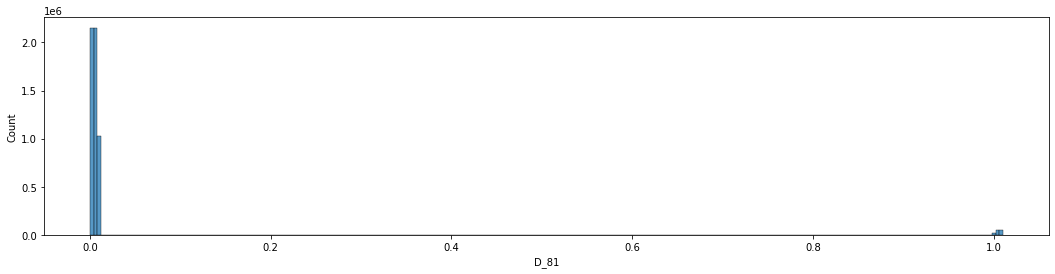

In [48]:
feat = 'D_81'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

### D_82

<AxesSubplot:xlabel='D_82', ylabel='Count'>

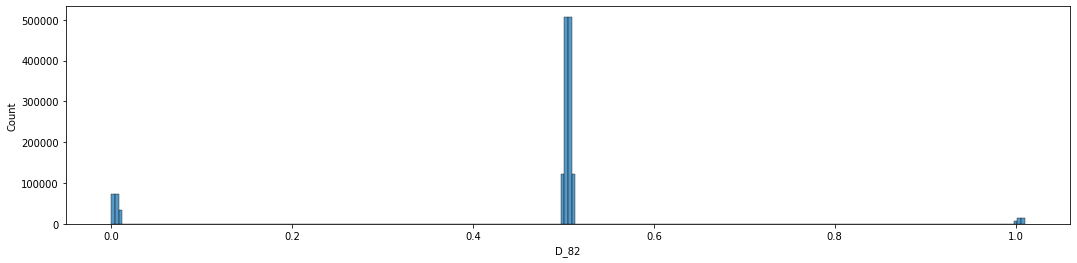

In [52]:
feat = 'D_82'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

### D_83

<AxesSubplot:xlabel='D_83', ylabel='Count'>

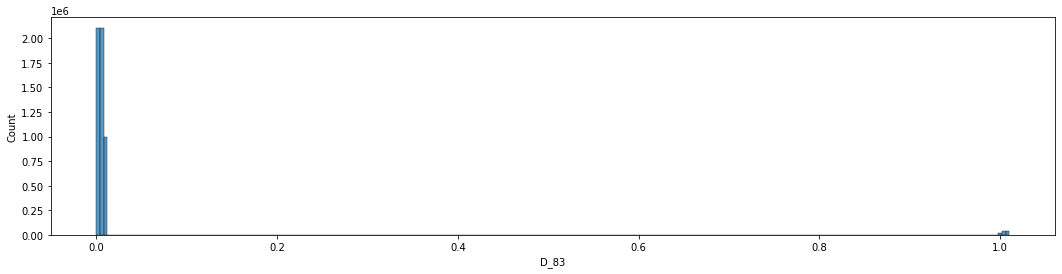

In [53]:
feat = 'D_83'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

## D_84

<AxesSubplot:xlabel='D_84', ylabel='Count'>

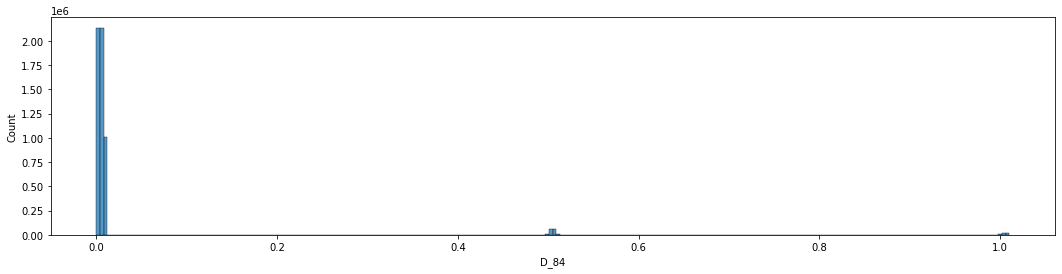

In [9]:
feat = 'D_84'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

## D_86

<AxesSubplot:xlabel='D_86', ylabel='Count'>

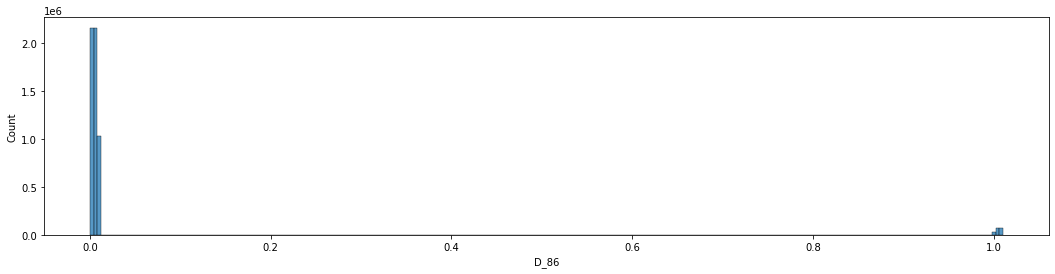

In [10]:
feat = 'D_86'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

## D_88

<AxesSubplot:xlabel='D_88', ylabel='Count'>

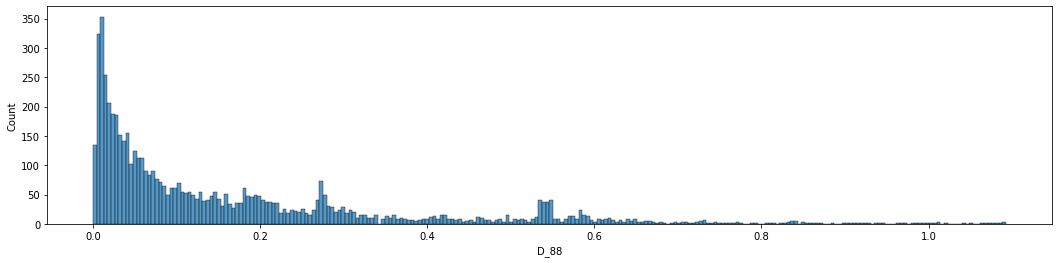

In [11]:
feat = 'D_88'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

## D_89

<AxesSubplot:xlabel='D_89', ylabel='Count'>

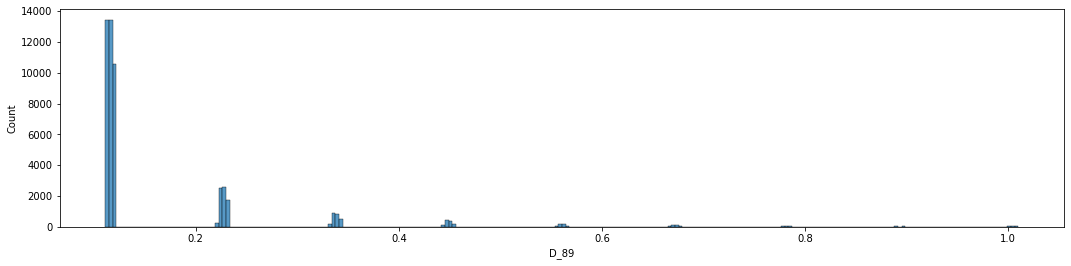

In [15]:
feat = 'D_89'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.02 <= {feat} <= 1.1"), bins=250)

## D_91

<AxesSubplot:xlabel='D_91', ylabel='Count'>

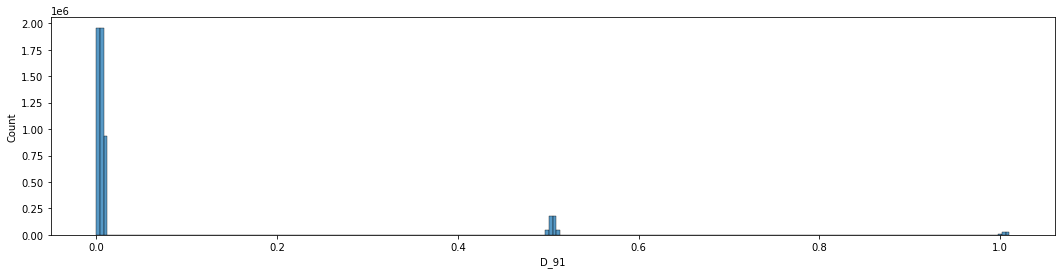

In [17]:
feat = 'D_91'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

## D_92

<AxesSubplot:xlabel='D_92', ylabel='Count'>

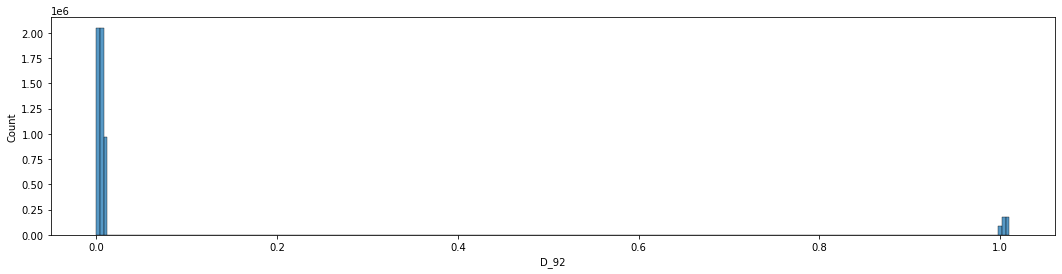

In [18]:
feat = 'D_92'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

## D_102

<AxesSubplot:xlabel='D_102', ylabel='Count'>

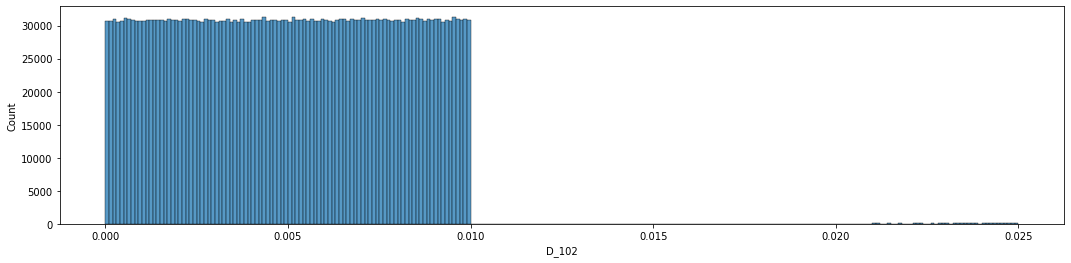

In [24]:
feat = 'D_102'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 0.025"), bins=250)

## D_104

<AxesSubplot:xlabel='D_104', ylabel='Count'>

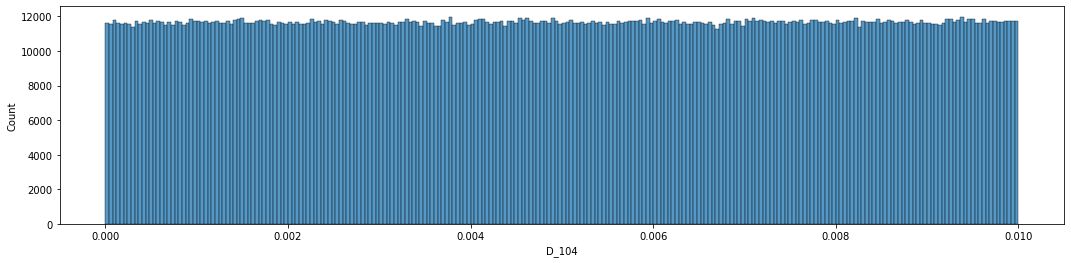

In [28]:
feat = 'D_104'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 0.2"), bins=250)

<AxesSubplot:xlabel='D_104', ylabel='Count'>

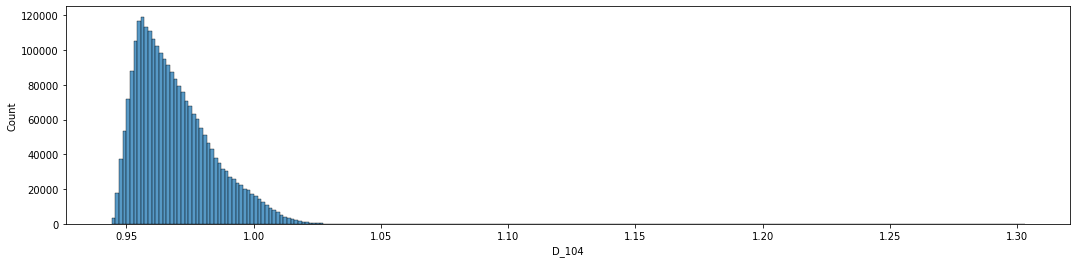

In [29]:
feat = 'D_104'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.2 <= {feat} <= 2"), bins=250)

<AxesSubplot:xlabel='D_104', ylabel='Count'>

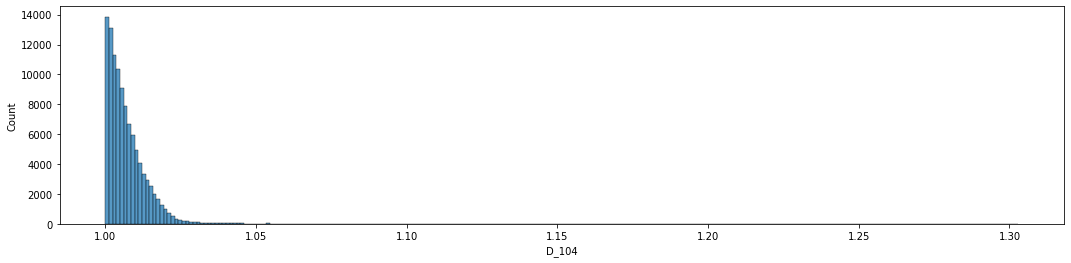

In [30]:
feat = 'D_104'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"1 <= {feat} <= 2"), bins=250)

## D_105

<AxesSubplot:xlabel='D_105', ylabel='Count'>

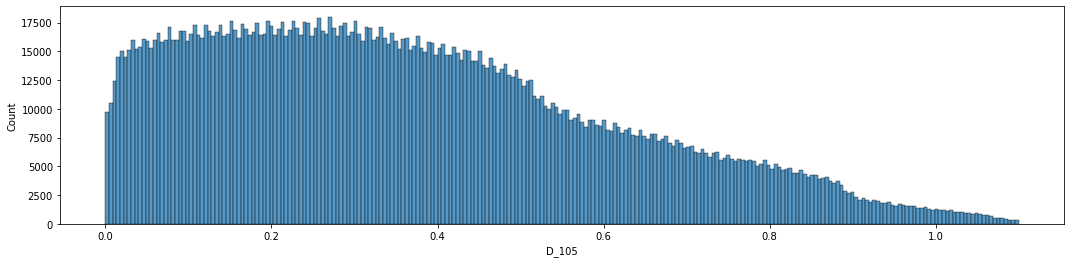

In [32]:
feat = 'D_105'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

## D_106

<AxesSubplot:xlabel='D_106', ylabel='Count'>

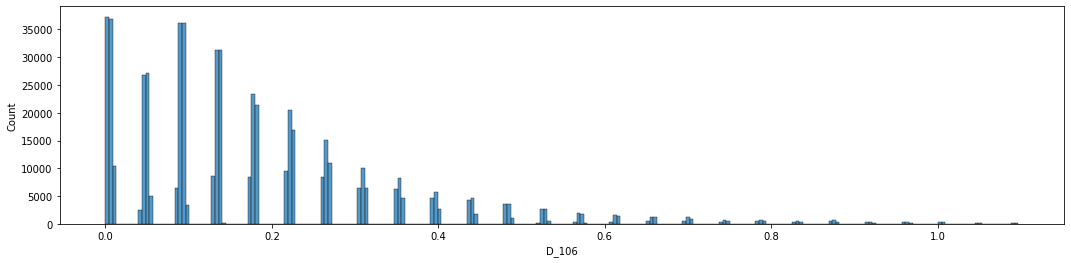

In [33]:
feat = 'D_106'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

## D_107

<AxesSubplot:xlabel='D_107', ylabel='Count'>

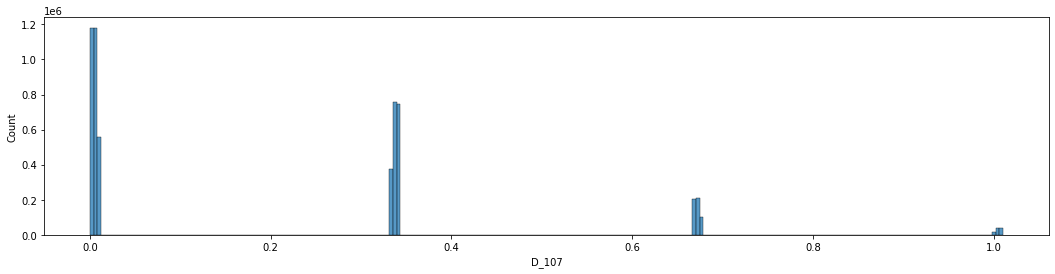

In [34]:
feat = 'D_107'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

## D_110

<AxesSubplot:xlabel='D_110', ylabel='Count'>

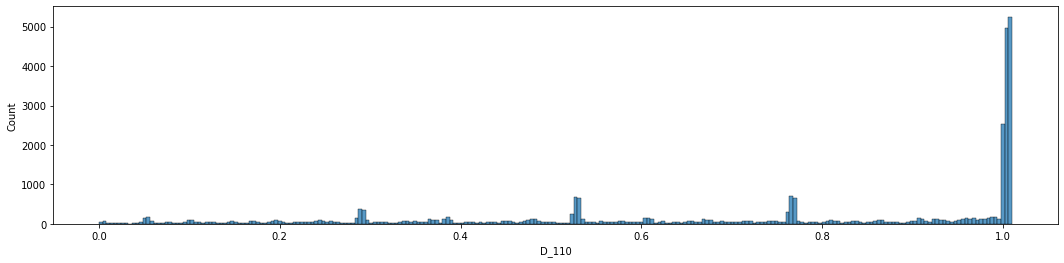

In [38]:
feat = 'D_110'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

<AxesSubplot:xlabel='D_112', ylabel='Count'>

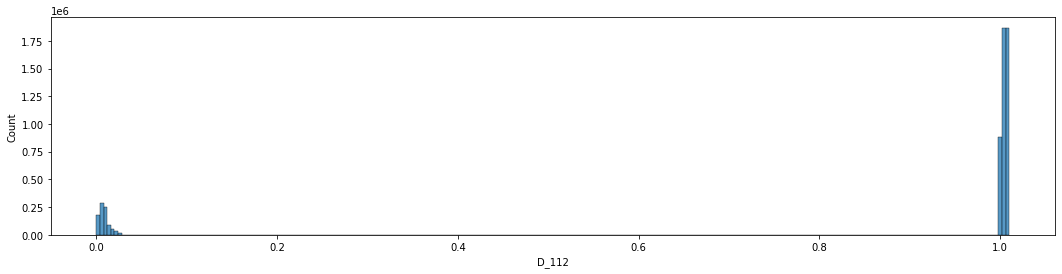

In [44]:
feat = 'D_112'
plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"0.0 <= {feat} <= 1.1"), bins=250)

<AxesSubplot:xlabel='S_8', ylabel='Count'>

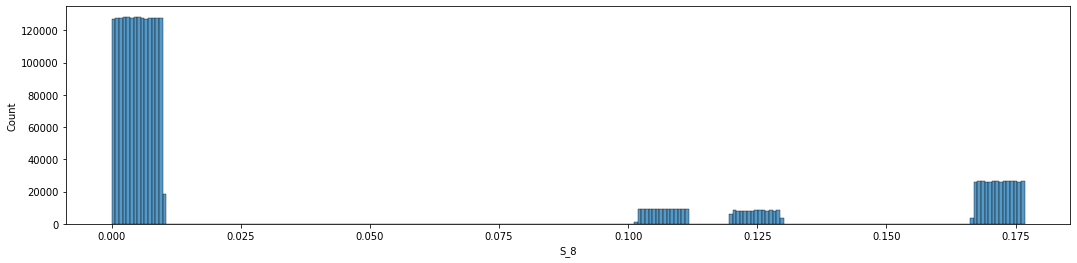

In [72]:
feat = 'S_8'
th_min = 0.0
th_max = 0.2

plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"{th_min} <= {feat} <= {th_max}"), bins=250)

<AxesSubplot:xlabel='S_8', ylabel='Count'>

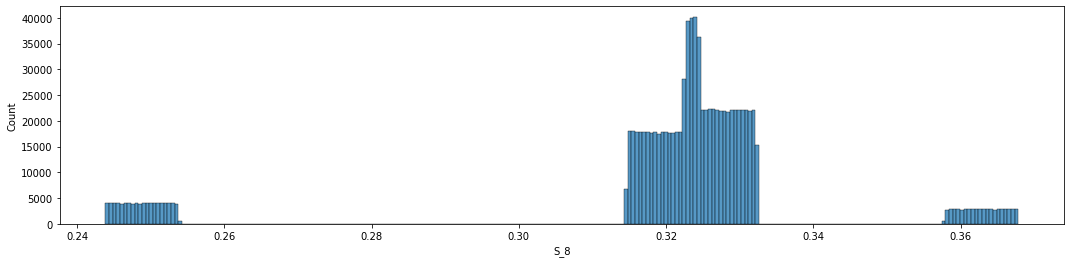

In [56]:
feat = 'S_8'
th_min = 0.2
th_max = 0.4

plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"{th_min} <= {feat} <= {th_max}"), bins=250)

<AxesSubplot:xlabel='S_8', ylabel='Count'>

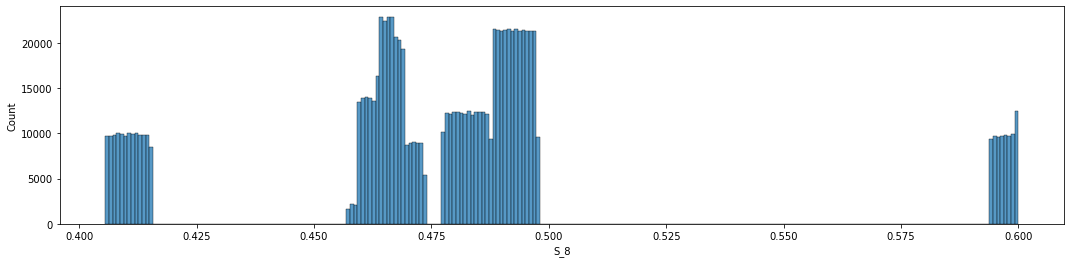

In [57]:
feat = 'S_8'
th_min = 0.4
th_max = 0.6

plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"{th_min} <= {feat} <= {th_max}"), bins=250)

<AxesSubplot:xlabel='S_8', ylabel='Count'>

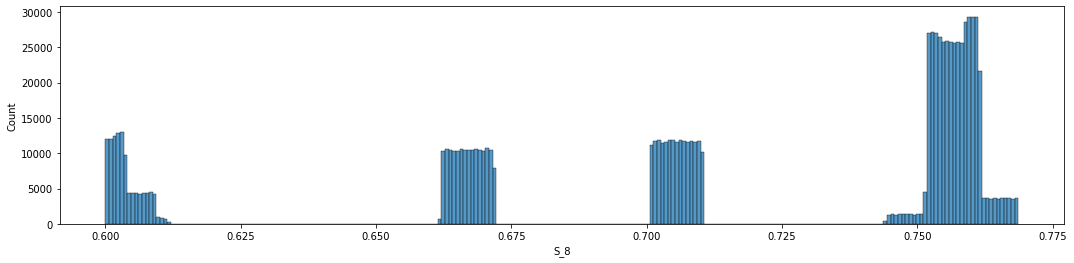

In [75]:
feat = 'S_8'
th_min = 0.6
th_max = 0.8

plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"{th_min} <= {feat} <= {th_max}"), bins=250)

<AxesSubplot:xlabel='S_8', ylabel='Count'>

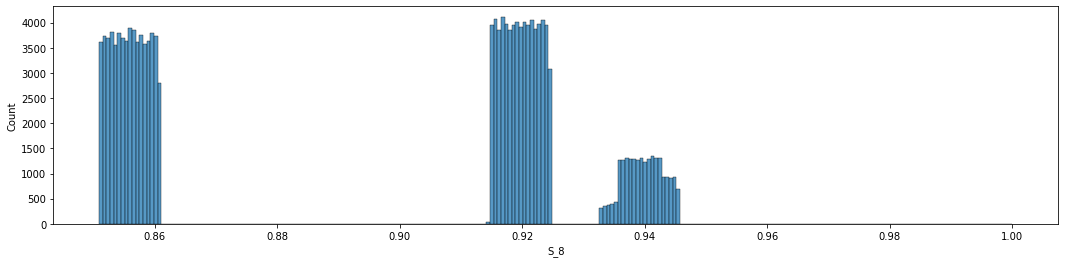

In [59]:
feat = 'S_8'
th_min = 0.8
th_max = 1.0

plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"{th_min} <= {feat} <= {th_max}"), bins=250)

In [69]:
df['S_8_prep'] = floorify_frac(df['S_8'], interval=1/18)

df.groupby('S_8_prep')['S_8'].agg(['min', 'max', 'count']).head(20)

,min,max,count
S_8_prep,,,
0,0.000,0.010,1808480
1,0.102,0.111,121530
2,0.111,0.130,125281
3,0.167,0.177,372867
4,0.244,0.254,80979
5,0.315,0.332,804589
6,0.358,0.368,57494
7,0.406,0.416,126734
8,0.457,0.498,725989


<AxesSubplot:xlabel='S_13', ylabel='Count'>

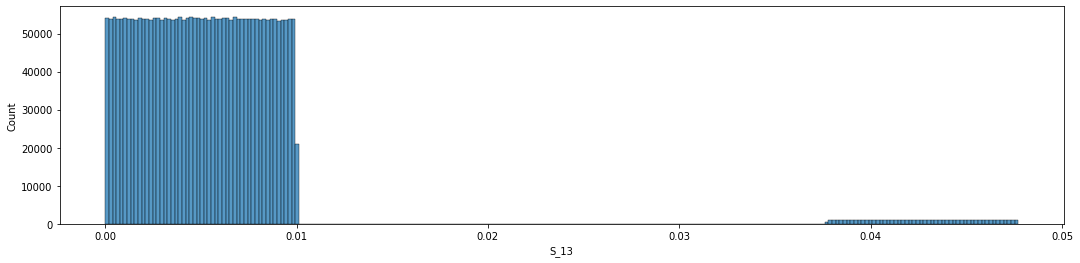

In [88]:
feat = 'S_13'
th_min = 0.0
th_max = 0.1

plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"{th_min} <= {feat} <= {th_max}"), bins=250)

In [92]:
df['S_13_prep'] = floorify_frac(df['S_13'], interval=1/10)

df.groupby('S_13_prep')['S_13'].agg(['min', 'max', 'count'])

,min,max,count
S_13_prep,,,
0,0.000,0.048,2873039
2,0.280,0.290,461183
4,0.401,0.431,1138901
5,0.507,0.565,271493
6,0.622,0.698,393548
8,0.843,0.853,171463
10,1.000,1.010,221824


<AxesSubplot:xlabel='B_19', ylabel='Count'>

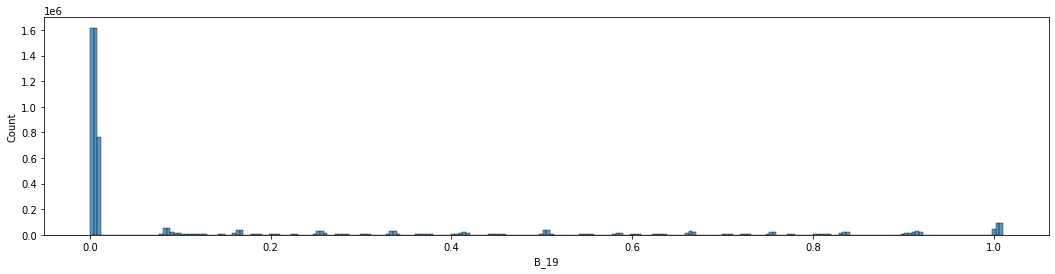

In [6]:
feat = 'B_19'
th_min = 0.0
th_max = 1.1

plt.figure(figsize=(18, 4))
sns.histplot(x=feat, data=df.query(f"{th_min} <= {feat} <= {th_max}"), bins=250)

In [4]:
%%time
with open('../input/test_data_B.pkl', 'rb') as f:
    test_b = pickle.load(f)
    
def get_str_yearmonth(s):
    year = str(s.year)
    month = str(s.month)
    if len(month) == 1:
        month = '0' + month
    return year + month

test_b['S_2'] = pd.to_datetime(test_b['S_2'])
test_b['year-month'] = test_b['S_2'].apply(get_str_yearmonth)

CPU times: user 18.3 s, sys: 2.54 s, total: 20.8 s
Wall time: 21.8 s


In [5]:
test_b.head()

,customer_ID,S_2,B_1,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10,B_11,B_12,B_13,B_14,B_15,B_16,B_17,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,B_26,B_27,B_28,B_29,B_30,B_31,B_32,B_33,B_36,B_37,B_38,B_39,B_40,B_41,B_42,year-month
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-02-19,0.011,0.814,0.002,0.116,0.010,0.175,1.251,1.004,0.001,-0.003,0.004,0.119,NaN,0.010,0.010,0.009,NaN,0.592,0.009,0.005,0.010,0.005,1.135,0.010,0.007,0.002,0.005,0.134,NaN,0.000,1,0.002,1.004,0.008,0.008,1.000,NaN,0.274,0.010,NaN,201902
1,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-03-25,0.011,0.811,0.009,0.135,0.026,0.177,0.234,1.009,0.006,0.031,0.010,0.121,0.028,0.025,0.022,0.001,NaN,0.591,0.000,0.002,0.008,0.008,0.208,0.005,0.004,0.006,0.010,0.145,NaN,0.000,1,0.007,1.005,0.000,0.015,1.000,NaN,0.354,0.007,NaN,201903
2,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-04-25,0.016,1.005,0.004,0.136,0.060,1.417,0.127,1.005,0.000,0.036,0.004,0.120,0.034,0.029,0.039,0.006,NaN,0.591,0.006,0.002,0.008,0.003,0.116,0.004,0.002,0.001,0.007,0.150,NaN,0.000,1,0.010,1.007,0.001,0.016,2.000,NaN,0.391,0.010,NaN,201904
3,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-05-20,0.022,0.817,0.015,0.147,0.003,0.045,0.145,1.009,0.007,0.043,0.013,0.073,0.041,0.026,0.025,0.010,NaN,0.591,0.003,0.007,0.009,0.004,0.132,0.006,0.004,0.006,0.006,0.160,NaN,0.000,1,0.005,1.010,0.001,0.018,2.000,NaN,0.403,0.007,NaN,201905
4,00000469ba478561f23a92a868bd366de6f6527a684c9a...,2019-06-15,0.016,0.810,0.011,0.136,0.142,0.040,0.178,1.007,0.001,0.063,0.007,0.049,0.063,0.009,0.017,0.000,NaN,0.593,0.001,0.008,0.010,0.000,0.153,0.000,0.001,0.006,0.003,0.145,0.002,0.000,1,0.008,1.002,0.001,0.015,2.000,NaN,0.360,0.009,NaN,201906


In [186]:
test_b.groupby('year-month')['B_29'].apply(lambda x: x.isnull().sum())

year-month
201804    385909
201805    390759
201806    395183
201807    399484
201808    403443
201809    408507
201810    796107
201811    804650
201812    812148
201901    820017
201902    825866
201903    833526
201904    842110
201905    408985
201906       133
201907       129
201908       130
201909        65
201910        12
Name: B_29, dtype: int64

In [6]:
t = test_b[test_b['year-month'] == '201910']

t[t['B_29'].isnull()].shape

(12, 43)